# Tutorial 4: Cleaning Survey Data
**Date**: Feb 2022

**Background**

* Following the [Tolerant usecase], we are going to analyze the data that has been collected through a survey to assess tolerance for a sample of university students. Our definition of tolerance is _an attitude or state of mind towards difference_ and it identifies three different aspect of tolerance. Put simply, we incorporate the following factors to develop our measures of tolerance:




**Data and Methods**

* We measure tolerance in one big sample with 300 students. The data has been collected by means of self-questionnarie and we ask students' opinion about attitudes towards tolerance. Our survey also includes aquestions associated with prejudice, such attitudes towards immigrants and homosexuals. We also ask participants about their past experiences and general socio-demographic questions.

* To test whether three factor model of tolerance fits well our dataset, we are going to conduct a confirmatory factor analysis (CFA) as the most appropriate statistical modeling for such research question.

Here is a description of the variables in the dataset (`clean_tolerance.csv` file):

|id|variable   |description                                                                                                                                                     |
|------|-----------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1     |id         |annoymized unique identifier per individual                                                                                                                                                       |
|2     |age        |Age of student                                                                                                                                                             |
|3     |gender     |Gender (from 0 to 10)                                                                                                                                                         |
|4     |height     |Height (scale in cm, e.g. 183)                                                                                                                                  |
|5     |country    |Where are you come from? (Country)                                                                                                                              |
|6     |language   |How many language you speak at home to your family?                                                                                                             |
|7     |freq_travel|How many different countries have you lived in?                                                                                                                 |
|8     |past_exp   |Past intercultural experience: have you ever done one of the following international programs?                                                                  |
|9     |q1         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [People should have the right to live how they wish]|
|10    |q2         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [It is important that people have the freedom to live their life as they choose]     |
|11    |q3         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [ It is okay for people to live as they wish as long as they do not harm other people]                                    |
|12    |q4         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s beliefs and opinions]        |
|13    |q5         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s opinions even when I do not agree]   |
|14    |q6         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like to spend time with people who are different from me]                                         |
|15    |q7         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like people who challenge me to think about the world in a different way]                            |
|16    |q8         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [Society benefits from a diversity of traditions and lifestyles]                            |


**Today's challenge**



## 1. Setup Library

Import the necessary libraries you will need to clean and pre-process the survey data.

In [1]:
import pandas as pd

## 2. Import Data 

For this tutorial, we will be using the **cleaned version** of "tolerance survey dataset". 
The csv file that we will be using `clean_tolerance.csv` is available at https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial4/inputs/clean_tolerance.csv 

Import this file in pandas using the `read_csv()` function.

In [2]:
#read the data into the dataframe

url = 'https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial4/inputs/clean_tolerance.csv'
df = pd.read_csv(url)
df.head(5)

,id,age,gender,height,country,language,freq_travel,past_exp,q1,q2,q3,q4,q5,q6,q7,q8
0,1,34.0,0,186,Spain,1.0,5.0,Volunteer service,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree
1,2,34.0,6,157,BR,2.0,3.0,Internship program,Strongly Agree,Strongly Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree
2,3,27.0,8,191,RU,4.0,2.0,Studying school abroad,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree
3,4,35.0,5,165,RU,3.0,5.0,Studying school abroad,Disagree,Strongly Agree,Strongly Agree,Disagree,Disagree,Agree,Agree,Agree
4,5,34.0,2,164,ID,5.0,5.0,Studying school abroad,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Disagree,Agree


## 3. Basic data understanding

In [7]:
# check how many variables and observations are in the dataset

In [12]:
print("The shape of the dataframe is",df.shape) 

The shape of the dataframe is (150, 16)


In [ ]:
#find out how many participants are in the survey?

In [15]:
#print the first 3 rows of the dataframe
df.head(3)

,id,age,gender,height,country,language,freq_travel,past_exp,q1,q2,q3,q4,q5,q6,q7,q8
0,1,34.0,0,186,Spain,1.0,5.0,Volunteer service,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree
1,2,34.0,6,157,BR,2.0,3.0,Internship program,Strongly Agree,Strongly Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree
2,3,27.0,8,191,RU,4.0,2.0,Studying school abroad,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree


In [25]:
#print the age and gender from the 2nd participant (hint: index should be 1)

In [21]:
print(df.iloc[1][1:3])

age       34
gender     6
Name: 1, dtype: object


In case you don't know much about the survey data that is being analyzed, you can always check the scale of all the columns by looking for the `min`, `max`, and `unique value counts`. This will let you know if you need to rescale the data or not.

## 4. Identify data types

How would you identify the data types of variables in the survey?

- Are they categorical or numerical?
- how to deal with different types of variables, - for example: `gender, age, height, q1` ?
- why they matter? 

In [22]:
# Check the data type of each variable
df.dtypes

id               int64
age            float64
gender           int64
height           int64
country         object
language       float64
freq_travel    float64
past_exp        object
q1              object
q2              object
q3              object
q4              object
q5              object
q6              object
q7              object
q8              object
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           150 non-null    int64  
 1   age          137 non-null    float64
 2   gender       150 non-null    int64  
 3   height       150 non-null    int64  
 4   country      150 non-null    object 
 5   language     143 non-null    float64
 6   freq_travel  143 non-null    float64
 7   past_exp     143 non-null    object 
 8   q1           140 non-null    object 
 9   q2           140 non-null    object 
 10  q3           121 non-null    object 
 11  q4           140 non-null    object 
 12  q5           150 non-null    object 
 13  q6           150 non-null    object 
 14  q7           150 non-null    object 
 15  q8           127 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 18.9+ KB


> Thinking: CHECK Variables 
> - **Height**: int64?
> - **Gender**: int64?
> - **Age**: float64?
> - **q1**: object

## 5. Analyzing Likert Scale survey questions

In [41]:
# how many participants disagree with q1 and q2 questions? Look for value_counts() at pandas documentation: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [24]:
df['q1']. value_counts()

Disagree             46
Strongly Disagree    36
Strongly Agree       30
Agree                28
Name: q1, dtype: int64

In [1]:
# convert the previous numbers into percentage

In [25]:
df['q1']. value_counts(normalize = True)

Disagree             0.328571
Strongly Disagree    0.257143
Strongly Agree       0.214286
Agree                0.200000
Name: q1, dtype: float64

## 6. Visualizing all survey questions

In [44]:
# plot/visualise categorical variable such as q4
# you may refer to this old notebook you already solved in the first year: https://nbviewer.org/github/MaastrichtU-IDS/global-studies/blob/main/semester2/notebooks/4.1-data-visualization.ipynb

<AxesSubplot:>

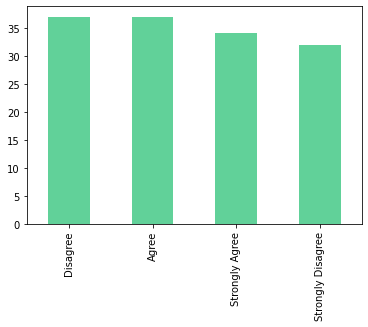

In [26]:
df['q4'].value_counts().plot(kind = "bar",color = "#61d199") # Neutral is missing ?

---
## 7. Transform/Prepare the data


Convert the exisiting scale of questionnaire items into numerical Likert Scale

> why? Look at the last 5 rows. What do you notice?

In [24]:
df.tail(5)

,id,age,gender,height,country,language,freq_travel,past_exp,q1,q2,q3,q4,q5,q6,q7,q8
145,172,21.0,7,175,RU,1.0,4.0,Studying school abroad,NaN,NaN,Strongly Disagree,NaN,Agree,Disagree,Agree,Strongly Disagree
146,173,40.0,6,163,CN,1.0,1.0,Internship program,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Disagree,Strongly Disagree,Agree
147,174,NaN,5,182,AR,2.0,3.0,None,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Disagree,Disagree,Agree,Disagree
148,176,35.0,2,160,PH,1.0,3.0,Internship program,Strongly Agree,Strongly Disagree,NaN,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree
149,177,NaN,8,160,CN,5.0,2.0,Internship program,Strongly Agree,Strongly Agree,NaN,Strongly Disagree,Strongly Disagree,Agree,Disagree,NaN


We need to map likert scale options _(i.e.strongly agree)_ to numbers _(i.e. 5) as following:

Strongly Agree ---> 5

Agree ---> 4

Neutral ---> 3

Disagree ---> 2

Agree ---> 1


In [4]:
df_transformed = df.replace(['Strongly Agree',
                   'Agree', 
                   'Neutral', 
                   'Disagree', 
                   'Strongly Disagree'], [5,4,3,2,1])
df_transformed.tail(5)

,id,age,gender,height,country,language,freq_travel,past_exp,q1,q2,q3,q4,q5,q6,q7,q8
145,172,21.0,7,175,RU,1.0,4.0,Studying school abroad,NaN,NaN,1.0,NaN,4,2,4,1.0
146,173,40.0,6,163,CN,1.0,1.0,Internship program,5.0,5.0,5.0,2.0,4,1,1,4.0
147,174,NaN,5,182,AR,2.0,3.0,None,1.0,1.0,1.0,4.0,2,2,4,2.0
148,176,35.0,2,160,PH,1.0,3.0,Internship program,5.0,1.0,NaN,1.0,1,1,5,1.0
149,177,NaN,8,160,CN,5.0,2.0,Internship program,5.0,5.0,NaN,1.0,1,4,2,NaN


In [5]:
len(df_transformed)

150

As you can see, the data set has already been converted to numbers. But double check the data types with `dtypes`. 

In [6]:
df_transformed.dtypes

id               int64
age            float64
gender           int64
height           int64
country         object
language       float64
freq_travel    float64
past_exp        object
q1             float64
q2             float64
q3             float64
q4             float64
q5               int64
q6               int64
q7               int64
q8             float64
dtype: object

## 8. Missing Values in the Dataset

We explore the missing values with heatmaps. Look at the following code and explain what it does before running

Text(0.5, 1.0, 'Missing values in the dataset')

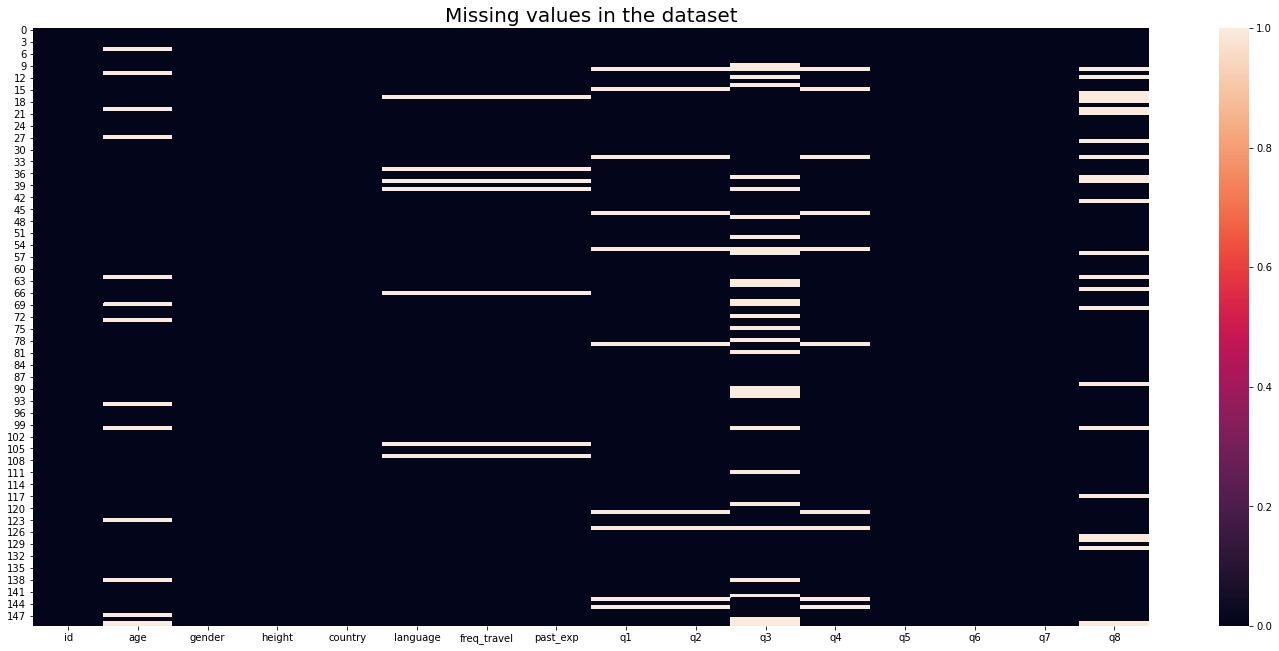

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
names = df_transformed.columns
plt.figure(figsize = (25,11))
sns.heatmap(df_transformed.isna().values, xticklabels=df_transformed.columns)
plt.title("Missing values in the dataset", size=20)

The main questionnarie items of interest are our survey items: q1, q2,...... q8. So we will drop rest of the columns.

In [ ]:
#drop the columns: id, age, gender, height, country, language, freq_travel and past_exp

In [8]:
df_transformed = df_transformed.drop(['id','age','gender','height','country','language','freq_travel','past_exp'], axis=1)
df_transformed

,q1,q2,q3,q4,q5,q6,q7,q8
0,5.0,5.0,5.0,5.0,5,4,5,5.0
1,5.0,5.0,4.0,4.0,2,2,2,2.0
2,1.0,5.0,2.0,5.0,1,1,5,2.0
3,2.0,5.0,5.0,2.0,2,4,4,4.0
4,5.0,4.0,5.0,5.0,4,2,2,4.0
...,...,...,...,...,...,...,...,...
145,NaN,NaN,1.0,NaN,4,2,4,1.0
146,5.0,5.0,5.0,2.0,4,1,1,4.0
147,1.0,1.0,1.0,4.0,2,2,4,2.0
148,5.0,1.0,NaN,1.0,1,1,5,1.0


Replace the missing value (NaN) with the mean of that column.

In [9]:
#Compute the means of each colum 
#Hint use the mean() funtion on the dataframe
column_means = df_transformed.mean()
column_means

q1    2.785714
q2    2.957143
q3    2.966942
q4    3.028571
q5    2.900000
q6    2.900000
q7    3.000000
q8    2.921260
dtype: float64

In [10]:
#Use the fillna() function to fill the missing (NaN) value with the mean
df_transformed_without_NaN = df_transformed.fillna(column_means)
df_transformed_without_NaN

,q1,q2,q3,q4,q5,q6,q7,q8
0,5.000000,5.000000,5.000000,5.000000,5,4,5,5.00000
1,5.000000,5.000000,4.000000,4.000000,2,2,2,2.00000
2,1.000000,5.000000,2.000000,5.000000,1,1,5,2.00000
3,2.000000,5.000000,5.000000,2.000000,2,4,4,4.00000
4,5.000000,4.000000,5.000000,5.000000,4,2,2,4.00000
...,...,...,...,...,...,...,...,...
145,2.785714,2.957143,1.000000,3.028571,4,2,4,1.00000
146,5.000000,5.000000,5.000000,2.000000,4,1,1,4.00000
147,1.000000,1.000000,1.000000,4.000000,2,2,4,2.00000
148,5.000000,1.000000,2.966942,1.000000,1,1,5,1.00000


Another way to address the missing values is to drop the rows with missing values from the DataFrame. 

In [11]:
df_transformed.dropna(inplace=True)

Check how many rows remain after dropping the rows with missing (NaN) values.

In [19]:
len(df_transformed)

87

Which of the following is a better strategy:

i) Drop the rows with missing values or

ii)Replace the missing values by mean or mode.